In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

news=[]
url='https://news.naver.com/'
response = urllib.request.urlopen(url)
soup=BeautifulSoup(response,'html.parser')
results=soup.select('.section_list_ranking li a')
for result in results:
    #print('제목:',result.attrs['title'])
    #print('링크:',result.attrs['href'])
    title=result.attrs['title']
    href=result.attrs['href']
    url_content='https://news.naver.com'+result.attrs['href']
    response_content = urllib.request.urlopen(url_content)
    soup_content=BeautifulSoup(response_content,'html.parser')
    content=soup_content.select_one('#articleBodyContents')
    #print(content.contents)

    #가공작업
    output=''
    for item in content.strings:
        stripped = str(item).strip()    #공백제거
        if stripped=='':
            continue
        else:
             output+=item
    output=output.replace('본문 내용TV플레이어','')
    output=output.replace('// flash 오류를 우회하기 위한 함수 추가','')
    output=output.replace('function _flash_removeCallback() {}','')
    output=output.strip()
    news.append({'title':title,'href':href,'contents':output})
    
#print(news)    
dataframe=pd.DataFrame(news)
dataframe.to_csv("news.csv", index=False)

# 1. 데이터 가져오기

In [2]:
df = pd.read_csv('news.csv', engine='python', encoding='utf-8')

In [3]:
sample_title = df['title'][:2]
sample_title

0              탄핵 발의된 추미애 또 부동산 발언 "문재인 정부탓 아냐"
1    "한 번도 경험해보지 못한 나라, 국민들은 '이생집망' 절규" 주호영의 외침
Name: title, dtype: object

In [4]:
sample_content = df['contents'][:2]
sample_content

0    "부동산이 서민 인생 저당잡는 경제시스템이 문제"[한국경제TV 김현경 기자]추미애 ...
1    미래통합당 주호영 원내대표가 21일 국회 본회의에서 교섭단체 대표연설을 하고 있다....
Name: contents, dtype: object

## 자신의 관심사에 맞는 단어로 데이터를 가져옵니다.

In [5]:
df.shape

(60, 3)

In [6]:
import re
p = '.*(코로나|여행|비행기|호텔).*'    # . 임의의 문자 한 개에 대응, * 0개 이상
topic = df[df['title'].str.match(p)|df['contents'].str.match(p)]
topic.shape

(28, 3)

In [7]:
topic.head()

,title,href,contents
1,"""한 번도 경험해보지 못한 나라, 국민들은 '이생집망' 절규"" 주호영의 외침",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,미래통합당 주호영 원내대표가 21일 국회 본회의에서 교섭단체 대표연설을 하고 있다....
6,"8월17일 임시공휴일 지정…文대통령 ""국민께 작은 위로되길""(종합)",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,국무회의서 8월17일 월요일 임시공휴일 지정8월 15일부터 17일까지 사흘 연휴생산...
7,8월17일 임시공휴일 확정…광복절부터 사흘연휴,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,국무회의 주재하는 문 대통령(서울=연합뉴스) 김주성 기자 = 문재인 대통령이 21일...
10,"""한 달 몇천만원씩 벌었는데…"" 코로나 6개월에 '초토화'",/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,코로나 6개월 [BC+AC] 1편▽ '사상 초유' 개학 연기·원격 수업에 ▽ 학생 ...
11,어쩐지 쇠 맛 나더라…후추 속 이 가루 정체는?,/main/ranking/read.nhn?mid=etc&sid1=111&rankin...,"인류의 넘버원 향신료, 후추후추는 예전부터 '향신료의 왕'으로 대접을 받았습니다. ..."


In [8]:
stopwords_kr = []

## 워드클라우드 작성 함수

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path ='C:\\Users\\admin\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunpenR.ttf',
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                        width = width, height = height).generate(data)
    print(wordcloud.words_)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

{'있다': 1.0, '있는': 0.5886524822695035, '기자': 0.3900709219858156, '대한': 0.3617021276595745, 'co kr': 0.3333333333333333, '있습니다': 0.3262411347517731, '재배포 금지': 0.3049645390070922, '하는': 0.2907801418439716, '것으로': 0.2765957446808511, '한다': 0.2624113475177305, '것이다': 0.2553191489361702, '밝혔다': 0.2553191489361702, '코로나19': 0.24822695035460993, '21일': 0.24113475177304963, '통해': 0.23404255319148937, '했다': 0.2198581560283688, '말했다': 0.2127659574468085, '이번': 0.2127659574468085, '위해': 0.2127659574468085, '하지만': 0.19858156028368795, '이후': 0.19148936170212766, '등을': 0.18439716312056736, '이런': 0.18439716312056736, '것은': 0.18439716312056736, '함께': 0.18439716312056736, '같은': 0.18439716312056736, '지난': 0.18439716312056736, '이동재': 0.18439716312056736, '사진': 0.1773049645390071, '모두': 0.1773049645390071, '경우': 0.1773049645390071, '다른': 0.1773049645390071, '무단 전재': 0.1773049645390071, '전재 재배포': 0.1773049645390071, '가장': 0.1702127659574468, '대해': 0.16312056737588654, '미국': 0.16312056737588654, '그런': 0.1560

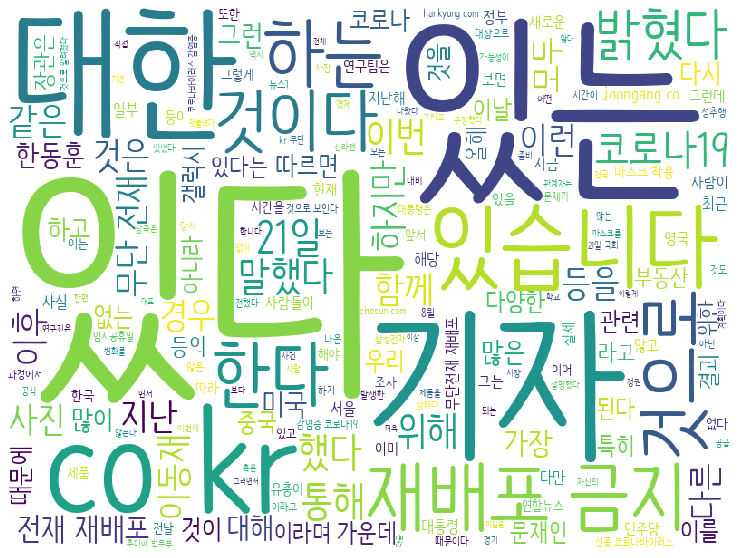

In [17]:
displayWordCloud(' '.join(df['contents']))

In [19]:
from soynlp.noun import LRNounExtractor

In [21]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(df['contents'])
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (2395, 1350) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 543 nouns are extracted
Wall time: 234 ms


{'규명': 1.0, '위치': 1.0, '업무': 1.0, '관심': 1.0, '특징': 1.0, '비리': 1.0, '표면': 1.0, '방지': 1.0, '금지': 1.0, '보도': 1.0, '제출': 1.0, '의혹': 1.0, '탄압': 1.0, '공정': 1.0, '재생': 1.0, '지목': 1.0, '화면': 1.0, '본인': 1.0, '판매': 1.0, '모두': 1.0, '단순': 1.0, '증가': 1.0, '운영': 1.0, '위선': 1.0, '홍보': 1.0, '기능': 1.0, '8월': 1.0, '유발': 1.0, '왼쪽': 1.0, '경계': 1.0, '기자': 1.0, '방문': 1.0, '간부': 1.0, '장악': 1.0, '백신': 1.0, '자료': 1.0, '거부': 1.0, '세상': 1.0, '지방': 1.0, '설치': 1.0, '투자': 1.0, '개발': 1.0, '지적': 1.0, '볼륨': 1.0, '시세': 1.0, '5월': 1.0, '상승': 1.0, '우보': 1.0, '감사': 1.0, '남성': 1.0, '경제': 1.0, '궁금': 1.0, '언론': 1.0, '시절': 1.0, '최고': 1.0, '주택': 1.0, '설명': 1.0, '과장': 1.0, '대화': 1.0, '마련': 1.0, '등교': 1.0, '아이': 1.0, '사람': 1.0, '국내': 1.0, '정확': 1.0, '사과': 1.0, '여부': 1.0, '움직': 1.0, '안전': 1.0, '적용': 1.0, '급식': 1.0, '파장': 1.0, '작가': 1.0, '투입': 1.0, '자리': 1.0, '공격': 1.0, '진단': 1.0, '한번': 1.0, '공시': 1.0, '시험': 1.0, '전문': 1.0, '노력': 1.0, '충치': 1.0, '공동': 1.0, '논의': 1.0, '반응': 1.0, '고려': 1.0, '입장': 1.0, '규정': 1.0, '연결': 1.0, '3년': 1.0

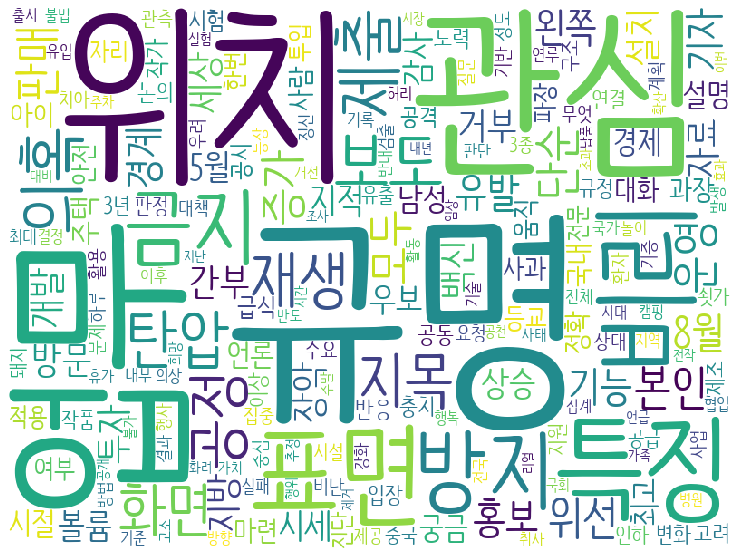

Wall time: 1.18 s


In [22]:
%time displayWordCloud(' '.join(nouns))